# Welcome to spindler Quickstart
There are two basic ways to use spindler.

- Compute the evolution of a binary system
- Provide the derivatives of the orbital parameters, which can then be used by another package to compute the evolution separately.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

%matplotlib widget

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams["mathtext.fontset"]="stix"
plt.rcParams["font.family"]="STIXGeneral"

### Computing the evolution
Compute the evolution of a binary system interacting with a circumbinary disk with the `evolve` method.

In [7]:
from spindler.solver import Solver_Siwek23, Solver_DD21, Solver_Zrake21

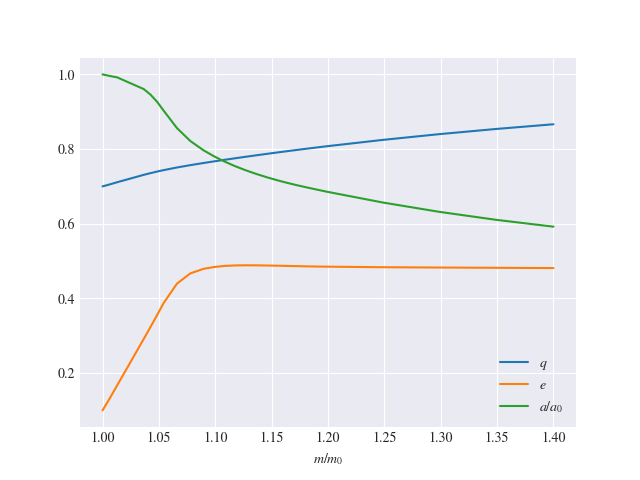

In [13]:
# Define the initial conditions
q0 = 0.7 # initial mass ratio
e0 = 0.1 # initial eccentricity

# Define the mass that will be accreted from the disk
# in units of the initial mass of the binary.
accreted_mass = 0.4 # 40% of the initial mass
 
# Compute the evolution
a, q, e, m = Solver_Siwek23().evolve(accreted_mass, q0, e0)

fig, ax = plt.subplots()
ax.plot(m,q, label="$q$")
ax.plot(m,e, label="$e$")
ax.plot(m,a, label="$a/a_0$")
ax.set_xlabel("$m/m_0$")
ax.legend()
plt.show()

The code would be analogous when using `Solver_DD21` or `Solver_Zrake21`, except that they only support `q0=1`.

`evolve` accepts any keyword argument that is accepted by `scipy.integrate.solve_ivp`.
For instance, you can pass the argument `t_eval` that defines at which values of `m` you want the solution to be calculated

interactive(children=(IntSlider(value=31, description='n_points', max=60, min=2), Output()), _dom_classes=('wi…

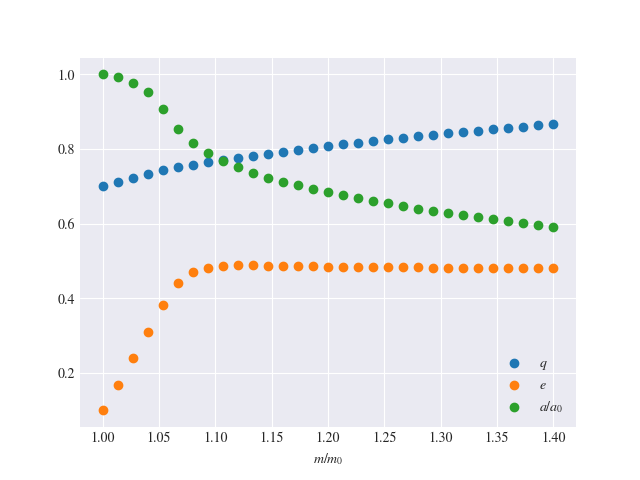

In [14]:
fig, ax = plt.subplots()
sq = ax.scatter(m,q, label="$q$")
se = ax.scatter(m,e, label="$e$")
sa = ax.scatter(m,a, label="$a/a_0$")
ax.set_xlabel("$m/m_0$")
ax.legend()

@ipywidgets.interact(n_points=(2,60))
def f(n_points):
    
    # Evaluate the solution only at these points
    m_eval = np.linspace(1, 1+accreted_mass, n_points)
    a,q,e,m = Solver_Siwek23().evolve(accreted_mass, q0, e0, t_eval=m_eval)

    sq.set_offsets(np.c_[m,q])
    se.set_offsets(np.c_[m,e])
    sa.set_offsets(np.c_[m,a])



you can play with the parameters `q0`, `e0` and `accreted_mass`

interactive(children=(FloatSlider(value=0.55, description='q0', max=1.0, min=0.1, step=0.01), FloatSlider(valu…

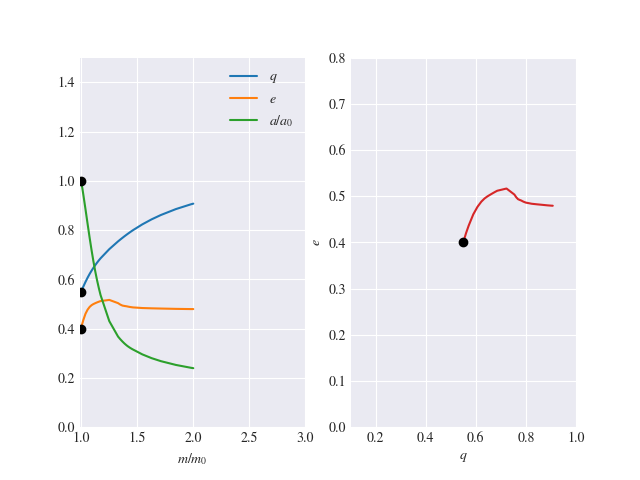

In [15]:
fig, axs = plt.subplots(1,2)
lq, = axs[0].plot([], label="$q$")
le, = axs[0].plot([], label="$e$")
la, = axs[0].plot([], label="$a/a_0$")
scatter0 = axs[0].scatter([],[], c="k",zorder=10)
axs[0].set_xlim(0.99,3)
axs[0].set_ylim(0,1.5)
axs[0].set_xlabel("$m/m_0$")
axs[0].legend()

line1, = axs[1].plot([], c="C3")
scatter1 = axs[1].scatter([],[], zorder=10, c="k")
axs[1].set_xlabel("$q$")
axs[1].set_ylabel("$e$")
axs[1].set_xlim(0.1,1)
axs[1].set_ylim(0,0.8)

@ipywidgets.interact(q0=(0.1,1,0.01),e0=(0,0.8,0.01),
        accreted_mass=ipywidgets.FloatSlider(min=0,max=3,step=0.01,value=1,style={'description_width': 'initial'}),
)
def f(q0,e0,accreted_mass):
    a, q, e, m = Solver_Siwek23().evolve(accreted_mass, q0, e0)
    lq.set_data(m,q)
    le.set_data(m,e)
    la.set_data(m,a)
    scatter0.set_offsets(np.c_[[1,1,1],[q0,e0,1]])
    line1.set_data(q, e)
    scatter1.set_offsets(np.c_[q0,e0])

### Computing the derivatives of the orbital parameters
The derivatives are expressed in logaritmic form i.e., the derivative of the quantity $X$ will be given as
$$\frac{d \log X}{d\log m},$$

where $m$ is the mass of the binary (the sum of the two components).

Spindler can compute the derivatives of the following quantities:
- eccentricity $e$
- mass ratio $q$
- semimajor axis $a$
- orbital energy $E$
- orbital angular momentum $J$

The derivatives can be accessed with the methods `get_De`, `get_Dq`, `get_De`, `get_DE`, and `get_DJ`.

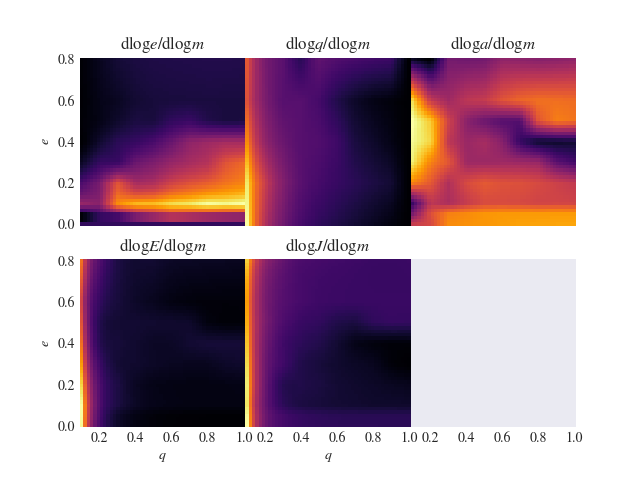

In [17]:
solver = Solver_Siwek23()
q_array = np.linspace(0.1,1,50)
e_array = np.linspace(0,0.8,50)
q,e = np.meshgrid(q_array,e_array)

# Compute the derivatives
De = solver.get_De(q,e)
Dq = solver.get_Dq(q,e)
Da = solver.get_Da(q,e)
DE = solver.get_DE(q,e)
DJ = solver.get_DJ(q,e)

# Plot them!
fig, axs = plt.subplots(2,3,sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)
cmap = "inferno"
axs[0][0].pcolormesh(q_array,e_array, De, cmap=cmap)
axs[0][1].pcolormesh(q_array,e_array, Dq, cmap=cmap)
axs[0][2].pcolormesh(q_array,e_array, Da, cmap=cmap)
axs[1][0].pcolormesh(q_array,e_array, DE, cmap=cmap)
axs[1][1].pcolormesh(q_array,e_array, DJ, cmap=cmap)

axs[0][0].set_title("dlog$e$/dlog$m$")
axs[0][1].set_title("dlog$q$/dlog$m$")
axs[0][2].set_title("dlog$a$/dlog$m$")
axs[1][0].set_title("dlog$E$/dlog$m$")
axs[1][1].set_title("dlog$J$/dlog$m$")
axs[0][0].set_ylabel("$e$")
axs[1][0].set_ylabel("$e$")
axs[1][0].set_xlabel("$q$")
axs[1][1].set_xlabel("$q$")
axs[1][2].grid(False)
axs[1][2].set_xticks([0.2,0.4,0.6,0.8,1.0])
plt.show()

  ## API documentation
https://spindler.readthedocs.io/